In [1]:
import train
from model import CSRNet
import density_preprocess
import torch.nn as nn
import torch
import torchvision
import os
import glob

import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = '../Dataset/'
data = []
for img in glob.glob(os.path.join(data_path, '*dots.png')):
    data.append(img)

In [5]:
model = CSRNet()

In [19]:
criterion = nn.MSELoss(size_average=False).cuda()

lr = 1e-7
momentum = 0.95
decay = 5*1e-4
optimizer = torch.optim.SGD(model.parameters(), lr,
                            momentum=momentum,
                            weight_decay=decay)


In [21]:
transform = torchvision.transforms.Compose([
                       torchvision.transforms.ToTensor(),
                       torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])


data = torchvision.datasets.ImageFolder(root=data_path, transform=transform)
data

Dataset ImageFolder
    Number of datapoints: 600
    Root location: ../Dataset/
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [22]:
train_loader = torch.utils.data.DataLoader(data, batch_size= 1, shuffle = True, drop_last= True)
train_loader

In [23]:
dataiter = iter(train_loader)

In [24]:
dataiter

In [14]:
images, labels = dataiter.next()

In [36]:
images[1][2].shape

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [27]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

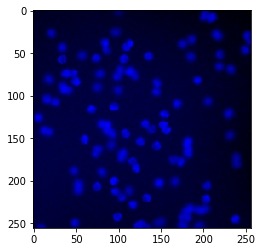

In [28]:
imshow(torchvision.utils.make_grid(images))

In [8]:
counts = density_preprocess.get_total_cell_counts('../Dataset/Dots')

In [ ]:
model.train()

In [ ]:
list(dataiter)

In [37]:
len('../Dataset/Dots')

15

In [40]:
len([name for name in os.listdir('../Dataset/Dots')])

200

In [41]:
homepath = '../Data/data'
datapath = homepath / 'data'
datapath

TypeError: unsupported operand type(s) for /: 'str' and 'str'